<a href="https://colab.research.google.com/github/Riku-KANO/basic-ml-model/blob/main/dl/activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 活性化関数
PyTorchに存在する活性化関数を順番に紹介をしていきます。全ては網羅することができませんがご容赦ください。


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

ここで扱うtorchのバージョンは1.12+cu113

In [ ]:
sns.set_theme()

warnings.simplefilter("ignore")
torch.__version__

'1.12.1+cu113'

## 活性化関数とは
　活性化関数とはニューラルネットのニューロン間の情報の伝搬に使われる非線形な関数である。活性化関数は生物の脳内のニューロンの仕組みに倣ったアイデアであり、一定以上の電気信号を受け取った際にその電気信号に応じて別の電気信号に変換し、それを他のニューロンに伝播させる。  
<br>
　代表的な活性化関数としてはReLU(Rectified Linear Unit)というものがあり、これは0より大きい信号はそのまま伝播させ、0以下の信号は全て0として次のニューロンに伝える。  式で記述すると以下の形になる。
$$\text{ReLU}(x)=\max(x, 0)$$
<br>
　活性化関数に類似しているものとしては音楽の機材でよく使われるコンプレッサーなどがある。コンプレッサーも同様に、受け取った音の信号(dB)をあるthreshold以上で音を潰し、それ以下であれば音に変化を与えない、といった操作を行う。  
<br>
　先ほど例として挙げた活性化関数ReLUは代表的なものであるがいくつかの問題を抱えている。例えば、$x=0$で微分不可能であるため、誤差逆伝搬の際に**勾配消失問題**を引き起こす可能性あり、安定した深層学習モデルの学習が困難になることが多々ある。正常な学習のためには正しく活性化関数を選択して学習モデルを構築しなければならないのである。  
<br>
　これまでに機械学習分野のトップカンファレンスで深層学習モデルの性能を引き出すための新しい活性化関数の設計に関する報告が多くされている。ここで紹介される活性化関数のほとんどはその研究をもとに構築されているものである。詳細がわかるものに関しては元論文のリンクを併記している。時間に余裕があるときに確認していただきたい。

# 活性化関数の種類
PyTorchの公式ドキュメントによると活性化関数は大きく以下の２つに大別されている。
```
- Non-linear Activations(weighted sum, nonlinearity)
- Non-linear Activations(Other)  
```
前者の活性化関数を理解しているだけで十分なのでここではそれのみを扱うことにする。また、ここで紹介する活性化関数は全て**torch.nn**モジュールの関数である。


In [ ]:
x = torch.linspace(-5, 5, 1001)

## nn.ELU
Exponential Linear Unit (ELU)  
\begin{equation}
  \text{ELU}(x)=
  \begin{cases}
    x, & \text{if $x>0$,} \\
    α*((\exp(x)-1), & \text{if $x\le0$,}
  \end{cases}
\end{equation}
<br>
Reference:  
https://arxiv.org/abs/1511.07289

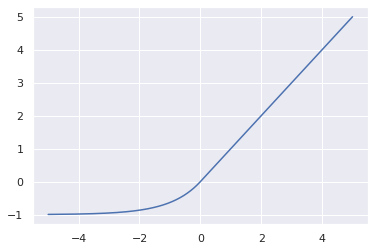

In [ ]:
act = nn.ELU()
y = act(x).detach().numpy()
sns.lineplot(x,y);

## nn.Hardshrink
\begin{equation}
  \text{Hardshrink}(x)=
  \begin{cases}
    x & \text{if $x>\lambda$,} \\
    x & \text{if $x<-\lambda$,} \\
    0 & \text{otherwise.}
  \end{cases}
\end{equation}

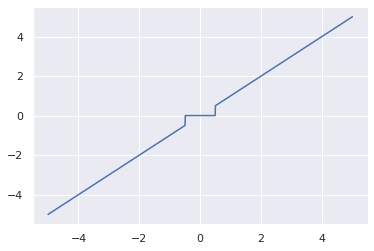

In [ ]:
act = nn.Hardshrink()
y = act(x)
sns.lineplot(x,y);

## nn.Hardsigmoid
\begin{equation}
  \text{Hardsigmoid}(x)=
  \begin{cases}
    1 & \text{if $x\ge3$,} \\
    0 & \text{if $x\le-3$,} \\
    x/6+1/2 & \text{otherwise.}
  \end{cases}
\end{equation}

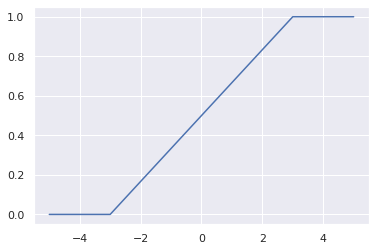

In [ ]:
act = nn.Hardsigmoid()
y = act(x)
sns.lineplot(x,y);

## nn.Hardtanh
\begin{equation}
  \text{Hardtanh}(x)=
  \begin{cases}
    \rm{max\_val} & \text{if $x>\rm{max\_val}$,} \\
    \rm{min\_val} & \text{if $x<\rm{min\_val}$,} \\
    x & \text{otherwise.}
  \end{cases}
\end{equation}

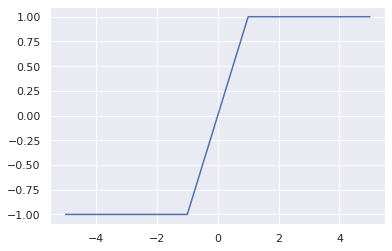

In [ ]:
act = nn.Hardtanh()
y = act(x)
sns.lineplot(x,y);

## nn.Hardswish
\begin{equation}
  \text{Hardswish}(x)=
  \begin{cases}
    x & \text{if $x\ge3$,} \\
    0 & \text{if $x\le-3$,} \\
    x\cdot(x+3)/6 & \text{otherwise.}
  \end{cases}
\end{equation}

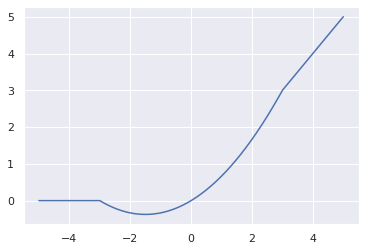

In [ ]:
act = nn.Hardswish()
y = act(x)
sns.lineplot(x,y);

## nn.LeakyReLU
\begin{equation}
  \text{LeakyReLU}(x)=
  \begin{cases}
    x & \text{if $x\ge0$,} \\
    \text{negative_slope}\times x & \text{otherwise}
  \end{cases}
\end{equation}

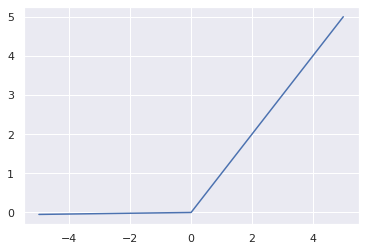

In [ ]:
act = nn.LeakyReLU()
y = act(x)
sns.lineplot(x,y);

## nn.LogSigmoid
$$\text{LogSigmoid}(x)=\log\left(\frac{1}{1+\exp(-x)}\right)$$

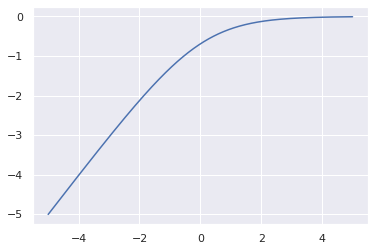

In [ ]:
act = nn.LogSigmoid()
y = act(x)
sns.lineplot(x,y);

## nn.PReLU
\begin{equation}
  \text{PReLU}(x)=
  \begin{cases}
    x & \text{if $x\ge0$,} \\
    a x & \text{otherwise}
  \end{cases}
\end{equation}

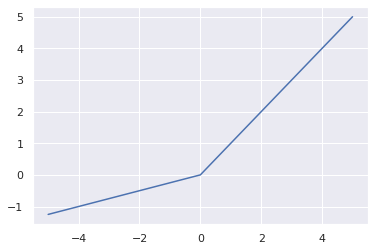

In [ ]:
act = nn.PReLU()
y = act(x).detach().numpy()
sns.lineplot(x,y);

## nn.ReLU
$$\text{ReLU}(x)=\max(0,x)$$

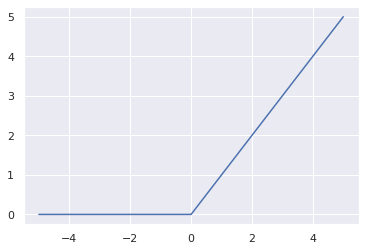

In [ ]:
act = nn.ReLU()
y = act(x)
sns.lineplot(x,y);

## nn.ReLU6
$$\text{ReLU6}(x)=\min(\max(0,x), 6)$$

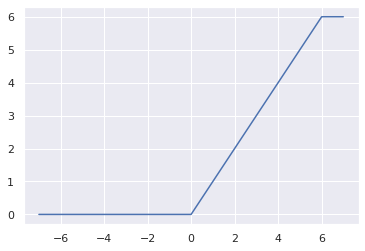

In [ ]:
x_tmp = torch.linspace(-7, 7, 1001)
act = nn.ReLU6()
y = act(x_tmp);
sns.lineplot(x_tmp,y);

## nn.RReLU
\begin{equation}
  \text{RReLU}(x)=
  \begin{cases}
    x & \text{if $x\ge0$,} \\
    a x & \text{otherwise}
  \end{cases}
\end{equation}
<br>
ただし$a$は一様分布$u(lower, upper)$から生成される乱数である。

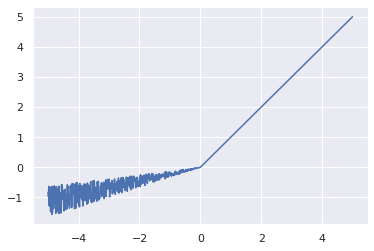

In [ ]:
act = nn.RReLU()
y = act(x)
sns.lineplot(x,y);

## nn.SELU
$$\text{SELU}(x)=\text{scale}*(\max(0, x) + \min(0, \alpha*(\exp(x)-1)))$$

Reference:  
https://arxiv.org/abs/1706.02515

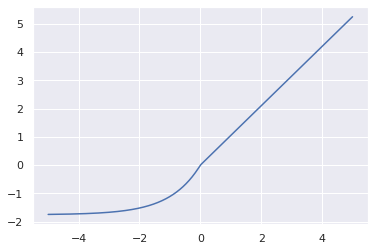

In [ ]:
act = nn.SELU()
y = act(x)
sns.lineplot(x,y);

## nn.CELU
$$\text{CELU}(x)=\max(0, x) + \min(0, \alpha*(\exp(x/\alpha)-1))$$
Reference:  
https://arxiv.org/abs/1704.07483

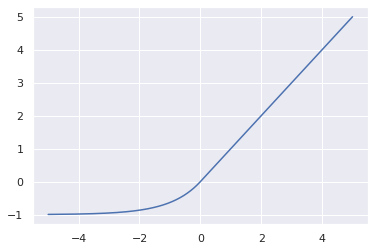

In [ ]:
act = nn.CELU()
y = act(x)
sns.lineplot(x,y);

## nn.GELU
$$\text{GELU}(x)=x*Φ(x)$$
<br>
ここで$\Phi(x)$はガウス分布の累積分布関数である。

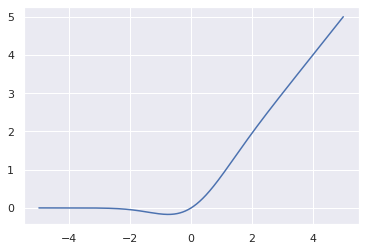

In [ ]:
act = nn.GELU()
y = act(x)
sns.lineplot(x,y);

## nn.Sigmoid
$$\text{Sigmoid}(x)=\sigma(x)=\frac{1}{1+\exp(-x)}$$

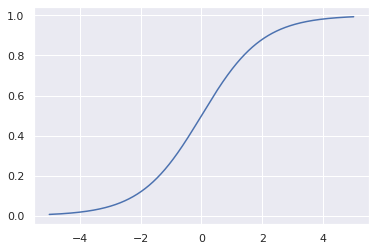

In [ ]:
act = nn.Sigmoid()
y = act(x)
sns.lineplot(x,y);

## nn.SiLU
Another calls this activation function ***'Swish'***  
$$\text{SiLU}(x)=x*\sigma(x)$$
<br>
ここで$\sigma(x)$はシグモイド関数である。  
<br>
Reference:  
https://arxiv.org/abs/1710.05941v1

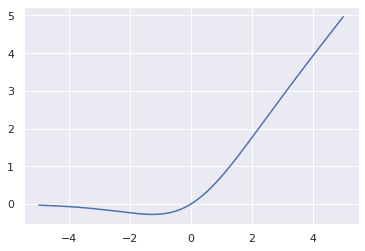

In [ ]:
act = nn.SiLU()
y = act(x)
sns.lineplot(x,y);

## nn.Mish
$$\text{Mish}(x)=x*\text{Tanh}(\text{Softplus}(x))$$

Reference:  
https://arxiv.org/abs/1908.08681

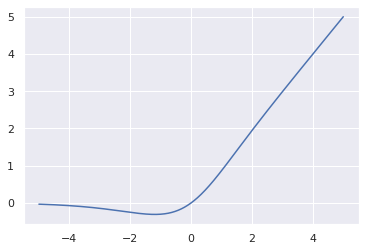

In [ ]:
act = nn.Mish()
y = act(x)
sns.lineplot(x,y);

## nn.Softplus
$$\text{Softplus}(x)=\frac{1}{\beta}*\log(1+\exp(\beta*x))$$
<br>
xの値が非常に大きくなった時(あるthreshold値を超えた時)、線形モデルに変わる。

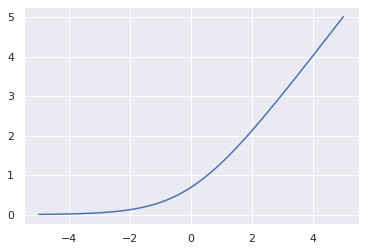

In [ ]:
act = nn.Softplus()
y = act(x)
sns.lineplot(x,y);

## nn.Softshrink
\begin{equation}
  \text{Softshrink}(x)=
  \begin{cases}
    x-\lambda & \text{if $x\gt\lambda$,} \\
    x+\lambda & \text{if $x\lt-\lambda$,} \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

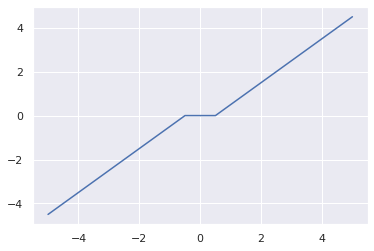

In [ ]:
act = nn.Softshrink()
y = act(x)
sns.lineplot(x,y);

## nn.Softsign

$$\text{Softsign}(x)=\frac{x}{1+|x|}$$

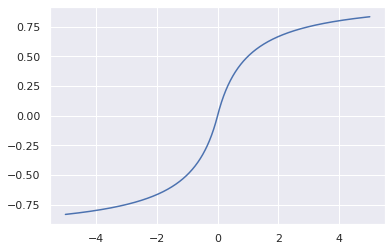

In [ ]:
act = nn.Softsign()
y = act(x)
sns.lineplot(x,y);

## nn.Tanh
$$\text{Tanh}(x)=\frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x)}$$

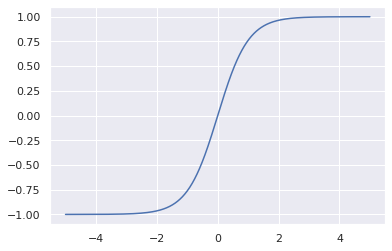

In [ ]:
act = nn.Tanh()
y = act(x)
sns.lineplot(x,y);

## nn.Tanhshrink
$$\text{Tanhshrink}(x)=x-\text{tanh}(x)$$

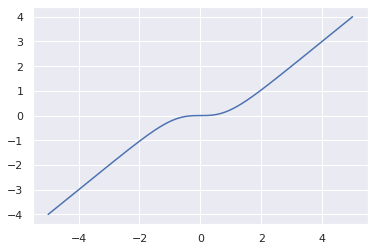

In [ ]:
act = nn.Tanhshrink()
y = act(x)
sns.lineplot(x,y);